In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pathlib
# create folder path
folder_path = pathlib.Path('Alcohol_eda')
# create empty dataframe
dfs = []
# create for loop to grab all files from folder_path
for file in folder_path.glob('*csv'):
    df = pd.read_csv(file)
    dfs.append(df)
combined_df = pd.concat(dfs, ignore_index=True)
combined_df.head()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [2]:
combined_df.set_index('id')
df_cols = ['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction']
alcohol_df = combined_df[df_cols]
alcohol_df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [3]:
combined_df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [4]:
combined_df = combined_df.dropna()

In [5]:
combined_df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [6]:
combined_df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [7]:
# identify the various dtypes of the data
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129487 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129487 non-null  int64  
 1   id                                 129487 non-null  int64  
 2   Gender                             129487 non-null  object 
 3   Customer Type                      129487 non-null  object 
 4   Age                                129487 non-null  int64  
 5   Type of Travel                     129487 non-null  object 
 6   Class                              129487 non-null  object 
 7   Flight Distance                    129487 non-null  int64  
 8   Inflight wifi service              129487 non-null  int64  
 9   Departure/Arrival time convenient  129487 non-null  int64  
 10  Ease of Online booking             129487 non-null  int64  
 11  Gate location                      129487 no

### GROUPING GENDERS ACCORDING FLIGHT CLASSES TO DETERMINE WHICH GENDER USED EACH OF THESE FLIGHT CLASSES THE MOST!!

In [8]:
df1 = combined_df.groupby('Gender')['Class'].value_counts(normalize=True).sort_values(ascending=False) * 100
df1.to_frame()


proportion
Gender Class               
Male   Business   48.305218
Female Business   47.454454
       Eco        45.007077
Male   Eco        44.754170
Female Eco Plus    7.538469
Male   Eco Plus    6.940612

<Axes: xlabel='Gender,Class'>

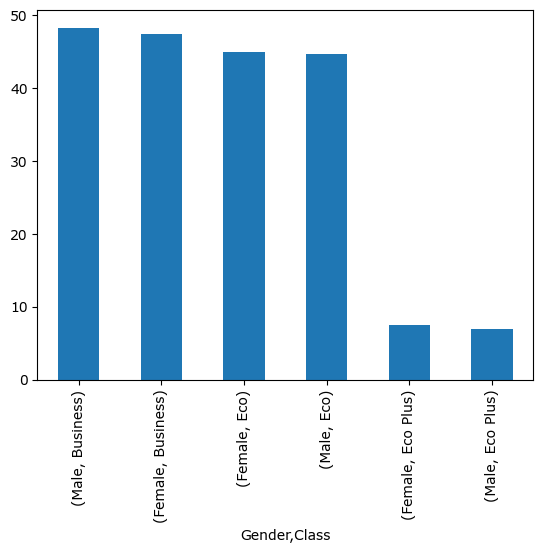

In [9]:
df1.plot(kind='bar')

In [10]:
# creating a new columns where the dataframe is group base on gender
combined_df['gender_cats'] = None
combined_df.loc[combined_df['Gender'] == 'Male', 'gender_cats'] = 'Males'
combined_df.loc[combined_df['Gender'] == 'Female', 'gender_cats'] = 'Females'
combined_df.gender_cats

0         Females
1         Females
2           Males
3           Males
4         Females
           ...   
129875    Females
129876      Males
129877      Males
129878    Females
129879      Males
Name: gender_cats, Length: 129487, dtype: object

In [11]:

df2 = combined_df.groupby('gender_cats')['Class'].value_counts(normalize=True).unstack() * 100
df2

Class,Business,Eco,Eco Plus
gender_cats,,,
Females,47.454454,45.007077,7.538469
Males,48.305218,44.754170,6.940612


In [12]:
df2.style.background_gradient(cmap='Greens')

Class,Business,Eco,Eco Plus
gender_cats,,,
Females,47.454454,45.007077,7.538469
Males,48.305218,44.754170,6.940612


#### Result above shows that Buisiness class has more male booking with up to 48% more than females. Eco class has more bookings by females with up to 45% when compared to males. Finally Eco plus has more Female bookings compared to male bookings.

#### WHICH GENDER ARE MOST SATISFIED WITH THE INFLIGHT ENTERTAINMENT?

In [13]:
df3 = combined_df.groupby('gender_cats')['Inflight entertainment'].value_counts(normalize=True).unstack() * 100
df3.style.background_gradient(cmap='Greens')

Inflight entertainment,0,1,2,3,4,5
gender_cats,,,,,,
Females,0.013698,12.133388,17.023576,18.458822,28.102218,24.268298
Males,0.014110,12.012417,16.794180,18.307099,28.562022,24.310172


#### where 0 to 5 represents the various level of satisfaction from lowest to highest
#### The result shows that Males enjoyed the inflight entertainment the most.

#### WHICH AGE BRACKET BOARDS FLIGHT THE MOST??

In [14]:
combined_df['age_cats'] = None
combined_df.loc[(combined_df['Age'] >1) & (combined_df['Age'] <=18), 'age_cats'] = 'Children'
combined_df.loc[(combined_df['Age'] >19) & (combined_df['Age'] <=60), 'age_cats'] = 'Adults'
combined_df.loc[(combined_df['Age'] >61) & (combined_df['Age'] <=150), 'age_cats'] = 'Old people'


<Axes: xlabel='age_cats'>

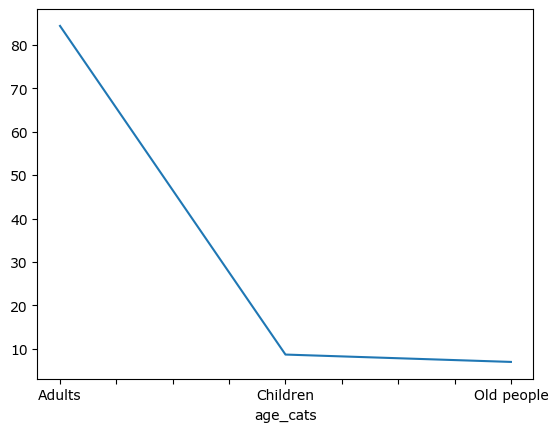

In [15]:
df5 = combined_df['age_cats'].value_counts(normalize=True) * 100
df5.plot(kind='line')

#### The plot above shows that Adults(persons between the age of 18 and 60) Board more flights than kids and old people

In [16]:
df5 = combined_df.groupby('gender_cats')['Type of Travel'].value_counts(normalize=True).unstack() * 100
df5.style.background_gradient(cmap='Greens')

Type of Travel,Business travel,Personal Travel
gender_cats,,
Females,69.496066,30.503934
Males,68.644174,31.355826


#### Results shows that Females make more business travels that Males with Females Business travels reaching up to 69% as compared to that of men which is 68%
#### Furthermore, Males made more travels more than Females with up to 31% rate more than Females.

#### What Factors determine satisfaction levels of customers?

                                 OLS Regression Results                                
Dep. Variable:           satisfaction   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                          1.325e+04
Date:                Thu, 07 Nov 2024   Prob (F-statistic):                        0.00
Time:                        11:21:10   Log-Likelihood:                         -25146.
No. Observations:               38846   AIC:                                  5.030e+04
Df Residuals:                   38843   BIC:                                  5.032e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

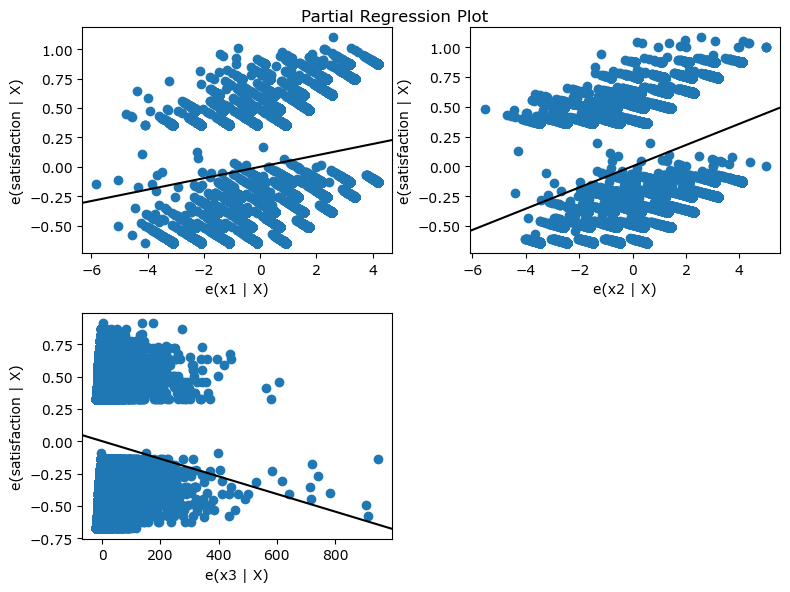

In [17]:
le = LabelEncoder()
combined_df['satisfaction'] = le.fit_transform(combined_df['satisfaction'])
X = combined_df[['Food and drink','On-board service','Departure Delay in Minutes']].values
y = combined_df['satisfaction']
#train the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.70,  random_state=1)
X = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train).fit()
print(model.summary())
y_pred = model.predict(X_test)

fig = plt.figure(figsize=(8,6))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

### Results are as follows;
#### 1. Dublin watson result shows that there is no multicolinearity among independent variables.
#### 2.R_squared shows that the model explains the relationship between the dependent variable 'Satisfaction and the independent variables 'Food and drink, On-board service, Departure Delay in Minutes'efficiently.
### 2. The coefficients;
#### a. For every unit of Delay in Departure time in Minutes(x3), Satisfaction(y) is decreased or reduced by 0.0007.
#### b.For every unit of on-board services rendered(x2), Satisfaction(y) is increased by 0.0898.
### Hypothesis Testing
#### H0: Delay time in minutes has no effect on satisfaction level
#### H1: Delay time in minutes affects satisfaction level.
#### ( where p-value is < 0.05 reject H0, and accept H1, where p-value is > 0.05 accept H0 and reject H1)
#### P-value of Departure Delay in minutes which is 0.000 is less than 0.05 so therefore we accept H1 which states that Delay time in minutes affects satisfaction level of customers.

In [18]:
# where neutral or dissatisfied is 0 and satisfied is 1
combined_df['dep_cats'] = None
combined_df.loc[(combined_df['Departure Delay in Minutes'] == 0), 'dep_cats'] = 'No delay'
combined_df.loc[(combined_df['Departure Delay in Minutes'] >1) & (combined_df['Departure Delay in Minutes'] <30), 'dep_cats'] = 'Less delay'
combined_df.loc[(combined_df['Departure Delay in Minutes'] >31) & (combined_df['Departure Delay in Minutes'] <10000), 'dep_cats'] = 'Excess delay'
df6 = combined_df.groupby('dep_cats')['satisfaction'].value_counts().unstack()
df6.style.background_gradient(cmap='Reds')

satisfaction,0,1
dep_cats,,
Excess delay,11147,6300
Less delay,19788,14307
No delay,39569,33640


#### Results show that customers with the highest level of neutral or unsatisfied and satisfied are customers whose flights where not delayed. 

### How is Satisfaction affeted by gender using a logistic regression

In [19]:
combined_df['Gender'] = le.fit_transform(combined_df['Gender'])
X = combined_df['Gender'].values
y = combined_df['satisfaction']
# train the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.80, random_state=1)
X = sm.add_constant(X_train)
model1 = sm.Logit(y_train,X_train).fit()
print(model1.summary())
# make prediction
yhat = model1.predict(X_test)
prediction = list(map(round, yhat))

# checking for model accuracy using confusion matrix
from sklearn.metrics import (confusion_matrix, accuracy_score) 

# confusion matrix 
cm = confusion_matrix(y_test, prediction)  
print ("Confusion Matrix : \n", cm)  
  
# accuracy score of the model 
print('Test accuracy = ', accuracy_score(y_test, prediction))
from sklearn.metrics import precision_score, f1_score

# Set zero_division parameter
precision = precision_score(y_test, prediction, zero_division=1)
f1 = f1_score(y_test, prediction, zero_division=0)

from sklearn.metrics import classification_report
target_names = ['male', 'female']
print(classification_report(y_test, prediction, target_names=target_names))



Optimization terminated successfully.
         Current function value: 0.689861
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                25897
Model:                          Logit   Df Residuals:                    25896
Method:                           MLE   Df Model:                            0
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:               -0.008411
Time:                        11:21:11   Log-Likelihood:                -17865.
converged:                       True   LL-Null:                       -17716.
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2313      0.018    -13.004      0.000      -0.266      -0.196
Confusion Matrix : 
 [[58538 

/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/private/var/containers/Bundle/Application/D721E0D6-082D-4E31-B46E-9646375762C3/Carnets-sci.app/Library/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricW

#### Interpretation: For every unit change in Gender (from male to female), the odds of being satisfied are 0.63(e^0.23) times higher.

#### What is the average departure delay in minutes?

In [20]:
combined_df['Departure Delay in Minutes'].mean()

14.643385050236704

#### The average above corresponds with the average departure delay time in minutes worldwide.

In [21]:
df7 = combined_df.groupby('Customer Type')['satisfaction'].value_counts(normalize=True).unstack() * 100
df7.style.background_gradient(cmap='Blues')

satisfaction,0,1
Customer Type,,
Loyal Customer,52.186286,47.813714
disloyal Customer,76.014169,23.985831


#### Results from analysis above shows that the 76% of neutral or unsatisfied Individuals are those Under the categories of Disloyal Customers while 47% of Loyal Customers are satisfied.

In [22]:
combined_df['Customer Type'] = le.fit_transform(combined_df['Customer Type'])
X = combined_df['Customer Type'].values
y = combined_df['satisfaction']
# train the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.80, random_state=1)
# fit model
X = sm.add_constant(X_train)
model2 = sm.OLS(y_train,X_train).fit()
print(model2.summary())

                                 OLS Regression Results                                
Dep. Variable:           satisfaction   R-squared (uncentered):                   0.025
Model:                            OLS   Adj. R-squared (uncentered):              0.024
Method:                 Least Squares   F-statistic:                              650.5
Date:                Thu, 07 Nov 2024   Prob (F-statistic):                   9.91e-142
Time:                        11:21:12   Log-Likelihood:                         -25583.
No. Observations:               25897   AIC:                                  5.117e+04
Df Residuals:                   25896   BIC:                                  5.118e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Hypothesis Testing
#### H0: There is no relationship between dependent variable(satisfaction and independent variable(Customer type)
#### H1: There is exists relationship between dependent variable(satisfaction and independent variable(Customer type)
#### (where p-value is <0.05 reject H0 and accept H1, and where p-value is >0.05 you accept H0 and reject H1)
#### Since p-value of Customer type is 0.000 which is less than 0.05 you accept H1 which sates that "There is exists relationship between dependent variable(satisfaction and independent variable(Customer type)". This means that customer type (Loyal or disloyal Customers) affects satisfaction level.

In [23]:
from scipy.stats import chi2_contingency

# Define contingency table
contingency_table = pd.crosstab(combined_df['Customer Type'], combined_df['satisfaction'])

# Perform chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Print results
print("Chi-Squared Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)

# Interpret results
if p_value < 0.05:
    print("Reject null hypothesis: There is no significant relationship between customer type and satisfaction.")
else:
    print("Fail to reject null hypothesis: There is significant relationship between customer type and satisfaction")

Chi-Squared Statistic: 4475.155050825033
P-value: 0.0
Degrees of Freedom: 1
Reject null hypothesis: There is no significant relationship between customer type and satisfaction.


#### The P-value from this chi squared test confirms the p-value from the Linear regression above.

### How is overall satisfaction related to flight distances and age demographics?

In [24]:
combined_df['Age'] = le.fit_transform(combined_df['Age'])

X = combined_df[['Age', 'Flight Distance']]
y = combined_df['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.70, random_state=1)
X = sm.add_constant(X_train)
model4 = sm.OLS(y_train,X_train).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:           satisfaction   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                          1.325e+04
Date:                Thu, 07 Nov 2024   Prob (F-statistic):                        0.00
Time:                        11:21:12   Log-Likelihood:                         -25146.
No. Observations:               38846   AIC:                                  5.030e+04
Df Residuals:                   38843   BIC:                                  5.032e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### A unit increase or change in Age will lead to a 0.098 increase in satisfaction rate.
#### A unit increase in Flight distance on the otherhand leads to a 0.0007 decrease in satisfaction rate.
#### DW results shows that there is absence of multicolinearity among independent variables.
#### R-squared shows that the model effectively expalins the relationship between the dependent and independent variables.
#### p-values of both independent variables are below 0.05 significant level which means that there exists a significant relationship between the dependent and independent variables.That is variables are associated.

### Are higher class passengers more satisfied than lower class passengers?

In [27]:
# Where 0 is neutral or unsatisfied and 1 is satisfied
df8 = combined_df.groupby('Class')['satisfaction'].value_counts(normalize=True).unstack() * 100
df8.style.background_gradient(cmap='Oranges')

satisfaction,0,1
Class,,
Business,30.553315,69.446685
Eco,81.241289,18.758711
Eco Plus,75.373134,24.626866


#### Results show that Higher Class travellers are more satified with the flight services with up to 69% satisfaction rate when compared with satisfaction rates of other classes which are 18% and 24% for Eco and Eco plus classes respectively.
#### On the otherhand Eco Class passengers are the most unsatisfied or neutrally satisfied with the flight services with upto 81% neutral or unsatisfied rate.